In [6]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 20000

## [The Chaos Game - Numberphile](https://www.youtube.com/watch?v=kbKtFN71Lfs)

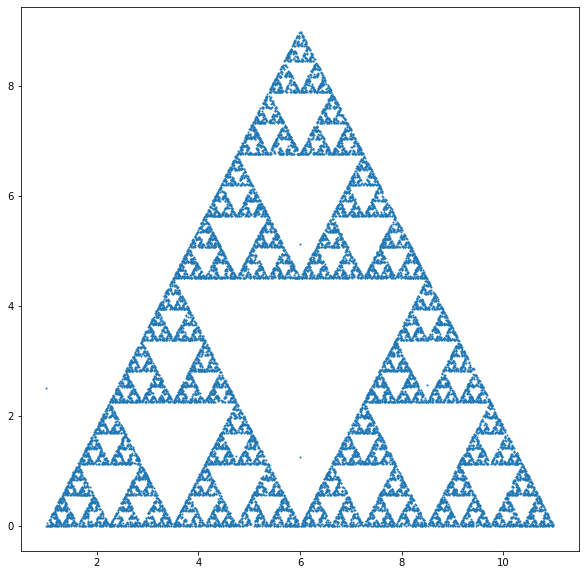

In [7]:
########################### The Sierpinski Triangle ##########################

# we assume a triangle shape with three nodes; not necesarily be equilateral, but it is easier to visualize if so
nodes = np.array([[1,0],[6,9],[11,0]],dtype=np.float32)
num_of_nodes = 3

# the starting point; will be updated iteratively
seed = np.array([1,5],dtype=np.float32)

# the trajectory of seed values stored as a list ; to be used for scatter plot
trajectory_x = []
trajectory_y = []


for _ in range(iterations):

  # we assume uniform probability for the three nodes. Akin to dice rolling in the numberphile video
  sample = np.random.randint(num_of_nodes,size=1) # returns random integers from the “discrete uniform” distribution

  # iteratively update seed values (x and y)
  seed[0] = (seed[0] + nodes[sample,0])/2.0
  seed[1] = (seed[1] + nodes[sample,1])/2.0

  # store values
  trajectory_x.append(seed[0])
  trajectory_y.append(seed[1])

# convert to numpy array
trajectory_x = np.asarray(trajectory_x)
trajectory_y = np.asarray(trajectory_y)

# plot using matplotlib
plt.figure(figsize=(10,10))
plt.scatter(trajectory_x,trajectory_y,s=1)
plt.show()

## [The Barnsley Fern](https://www.algorithm-archive.org/contents/barnsley/barnsley.html) 

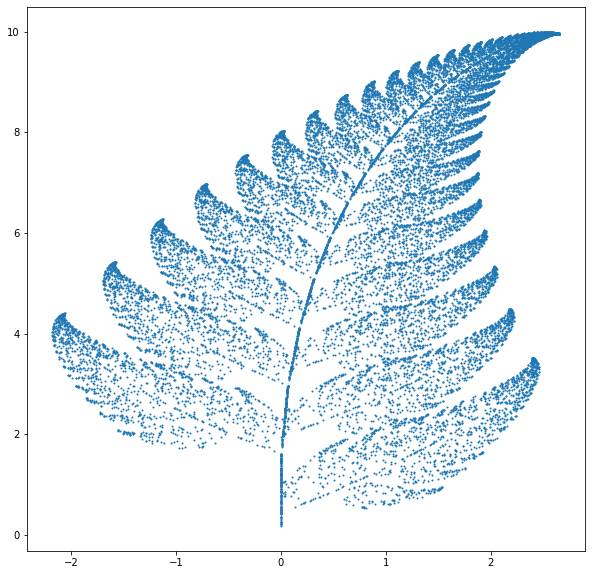

In [8]:

############################################ The Barnsley Fern ###########################################################

# barnsley_hutchinson
bh = np.array([[[0.0,0.0,0.0],[0.0,0.16,0.0],[0.0,0.0,1.0]],
               [[0.85,0.04,0.0],[-0.04,0.85,1.60],[0.0,0.0,1.0]],
               [[0.20,-0.26,0.0],[0.23,0.22,1.60],[0.0,0.0,1.0]],
               [[-0.15,0.28,0.0],[0.26,0.24,0.44],[0.0,0.0,1.0]]],dtype=np.float32)

# barnsley_probabilities
bp = np.array([0.01, 0.85, 0.07, 0.07],dtype=np.float32)

# indexes of bh for sampling with probabilities bp
indexes = np.array([0,1,2,3],dtype=np.int8)

# the starting point; will be updated iteratively
seed = np.array([0,0,1],dtype=np.float32) # 1 is added for 3x3 matrix multiplication
seed = np.expand_dims(seed,axis=1)

# the trajectory of seed values stored as a list ; to be used for scatter plot
trajectory_x = []
trajectory_y = []

for _ in range(iterations):

  # we assume uniform probability for the three nodes. Akin to dice rolling in the numberphile video
  sample_index = np.random.choice(indexes,size=1,p=bp) # returns random integers from the “discrete uniform” distribution

  # iteratively update seed values (x and y)
  seed = np.matmul(bh[sample_index],seed)
  seed = np.squeeze(seed)

  # store values
  trajectory_x.append(seed[0])
  trajectory_y.append(seed[1])

# convert to numpy array
trajectory_x = np.asarray(trajectory_x)
trajectory_y = np.asarray(trajectory_y)

# plot using matplotlib
plt.figure(figsize=(10,10))
plt.scatter(trajectory_x,trajectory_y,s=1)
plt.show()